# Import File for ANALYSIS

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

data_label=np.load("data/Training_data_labels.npy")
data_img=np.load("data/Training_data_images.npy")
data_test=np.load("data/PrivateTest_data_images.npy")

print("Test data type:",data_test.dtype)
print("Test data shape:",data_test.shape)
print("Train data shape:",data_img.shape)
print("Label data shape:",data_label.shape)

Test data type: float64
Test data shape: (1153, 48, 48)
Train data shape: (9328, 48, 48)
Label data shape: (9328,)


In [15]:
data_label

array([0, 6, 3, ..., 0, 5, 0], dtype=int64)

# Visualize the image

# Test Train Split


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_img, data_label, test_size=0.2, random_state=42)

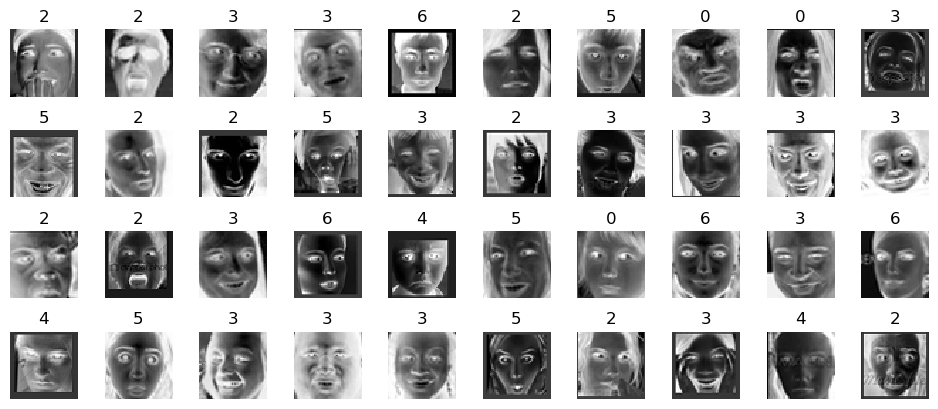

In [17]:
# Create a randomize picture and match it with their label emotion
# 0 = 'angry'
# 1 = 'disgusted'
# 2 = 'fearful'
# 3 = 'happy'
# 4 = 'sad'
# 5 = 'surprised'
# 6 = 'neutral'

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [18]:
X_train=X_train/255
X_test=X_test/255

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [ ]:
X_train.shape

(7462, 48, 48)

In [ ]:
X_test.shape

(1866, 48, 48)

In [35]:
import tensorflow as tf
from tensorflow import keras

ImportError: cannot import name 'keras' from 'tensorflow' (unknown location)

In [37]:
import tensorflow as tf

# Define your model using tf.keras.Sequential or any other tf.keras API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model using your data
model.fit(x_train, y_train, epochs=5)


AttributeError: module 'tensorflow' has no attribute 'keras'

In [33]:
K = tf.keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

AttributeError: module 'tensorflow' has no attribute 'keras'

Gradient Clipping

In [15]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

In [16]:
keras.backend.clear_session()

model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[48, 48]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(7, activation="softmax"))

CNN Method

In [22]:
X_train_scaled_CNN = np.expand_dims(X_train_scaled, axis=-1)
X_test_scaled_CNN = np.expand_dims(X_test_scaled, axis=-1)
from keras.utils import to_categorical

# Assuming y_train has shape (num_samples,)
y_train_CNN = to_categorical(y_train, num_classes=7)  # 7 represents the number of classes/emotions
y_test_CNN = to_categorical(y_test, num_classes=7)

ModuleNotFoundError: No module named 'tensorflow.compat'

In [18]:
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48,1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(7, activation='softmax')
])

In [ ]:
keras.backend.clear_session()

model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48,1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(256, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(7, activation='softmax')
])

In [20]:
import os
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [ ]:
X_train_scaled.shape

(7462, 48, 48)

In [ ]:
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Example learning rate, adjust as needed
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train_scaled_CNN, y_train_CNN, epochs=30,
                    validation_data=(X_test_scaled_CNN, y_test_CNN),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/30
234/234 [==============================] - 89s 374ms/step - loss: 1.6631 - accuracy: 0.3628 - val_loss: 1.4068 - val_accuracy: 0.4866
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


234/234 [==============================] - 98s 417ms/step - loss: 1.3982 - accuracy: 0.4925 - val_loss: 1.2448 - val_accuracy: 0.5429
Epoch 3/30
234/234 [==============================] - 87s 372ms/step - loss: 1.2685 - accuracy: 0.5315 - val_loss: 1.1812 - val_accuracy: 0.5740
Epoch 4/30
234/234 [==============================] - 86s 369ms/step - loss: 1.1724 - accuracy: 0.5669 - val_loss: 1.1421 - val_accuracy: 0.5863
Epoch 5/30
234/234 [==============================] - 82s 352ms/step - loss: 1.0778 - accuracy: 0.5951 - val_loss: 1.0991 - val_accuracy: 0.5965
Epoch 6/30
234/234 [==============================] - 82s 350ms/step - loss: 0.9908 - accuracy: 0.6324 - val_loss: 1.1152 - val_accuracy: 0.6013
Epoch 7/30
234/234 [==============================] - 89s 380ms/step - loss: 0.8999 - accuracy: 0.6607 - val_loss: 1.1297 - val_accuracy: 0.6125
Epoch 8/30
234/234 [==============================] - 88s 375ms/step - loss: 0.8331 - accuracy: 0.6865 - val_loss: 1.1601 - val_accuracy: 0.6

In [ ]:
model_CNN = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model_CNN.evaluate(X_test_scaled_CNN, y_test_CNN)


# **MobileNETV2**




In [ ]:
keras.backend.clear_session()

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization, Dropout


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dropout, Dense, BatchNormalization, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Constants
DROPOUT_RATE = 0.5  # Define your dropout rate here

# Base model (ResNet50 with pre-trained weights)
base_model = ResNet50(
    weights="imagenet",
    input_shape=(48, 48, 3),
    include_top=False,
    pooling="avg"
)

# Custom classifier layers
x = base_model.output
x = Flatten(name="flatten")(x)
x = Dropout(DROPOUT_RATE)(x)
x = Dense(4096, activation="relu", name="fc6")(x)
x = Dropout(DROPOUT_RATE)(x)
x = Dense(1024, activation="relu", name="fc7")(x)
x = Dropout(DROPOUT_RATE)(x)

# Output layer
out = Dense(7, activation="softmax", name="classifier")(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=out)

# Freeze layers up to the last batch normalization layer
batch_norm_indexes = [i for i, layer in enumerate(base_model.layers) if "BatchNormalization" in str(layer)]
for i, layer in enumerate(base_model.layers):
    if i not in batch_norm_indexes:
        layer.trainable = False

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer=Adam(lr=0.001), metrics=["accuracy"])

# Print model summary to inspect the architecture
model.summary()


94765736/94765736 [==============================] - 1s 0us/step


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 54, 54, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 24, 24, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 24, 24, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

for layer in base_model.layers:
    layer.trainable = False

# Create a new model using the MobileNetV2 base and add custom layers for emotion classification
inputs = Input(shape=(48,48, 3))  # Adjust input shape for MobileNetV2 (3 channels)

# Preprocess inputs using BatchNormalization and feature extraction
x = BatchNormalization()(inputs)
x = base_model(x, training=False)

# Additional convolutional layers
x = Conv2D(64, (3,3), activation='relu',padding='same')(x)
x = MaxPooling2D(2, 2)(x)
x = Conv2D(64, (3,3), activation='relu',padding='same')(x)


x = Flatten()(x)
x= Dense(128, activation='relu')(x)

# Regularization techniques: Dropout and BatchNormalization
x = Dropout(0.5)(x)
x = BatchNormalization()(x)

# Output layer
outputs = Dense(7, activation='softmax')(x)

# Create the final model
model = Model(inputs, outputs)


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),  # Adjust learning rate as needed
              metrics=['accuracy'])

In [ ]:
image_train = tf.expand_dims(X_train_scaled, -1)
image_test = tf.expand_dims(X_test_scaled, -1)
image_train = np.repeat(image_train, 3, -1)
image_test = np.repeat(image_test, 3, -1)

#image_train = tf.image.resize(image_train, size = (48 * 2, 48 * 2),preserve_aspect_ratio = True)
#image_test = tf.image.resize(image_test, size = (48 * 2, 48 * 2),preserve_aspect_ratio = True)


y_train_VNET = to_categorical(y_train, num_classes=7)
y_test_VNET = to_categorical(y_test, num_classes=7)

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(image_train, y_train_VNET, epochs=30,
                    validation_data=(image_test, y_test_VNET),
                    batch_size=32,
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/30
234/234 [==============================] - 7s 23ms/step - loss: 1.6265 - accuracy: 0.3814 - val_loss: 1.5148 - val_accuracy: 0.4319
Epoch 2/30
234/234 [==============================] - 4s 17ms/step - loss: 1.4823 - accuracy: 0.4437 - val_loss: 1.4807 - val_accuracy: 0.4384
Epoch 3/30
234/234 [==============================] - 5s 19ms/step - loss: 1.4155 - accuracy: 0.4744 - val_loss: 1.4647 - val_accuracy: 0.4566
Epoch 4/30
234/234 [==============================] - 5s 20ms/step - loss: 1.3713 - accuracy: 0.4942 - val_loss: 1.4565 - val_accuracy: 0.4571
Epoch 5/30
234/234 [==============================] - 4s 19ms/step - loss: 1.3285 - accuracy: 0.5066 - val_loss: 1.4667 - val_accuracy: 0.4502
Epoch 6/30
234/234 [==============================] - 4s 17ms/step - loss: 1.2850 - accuracy: 0.5268 - val_loss: 1.4413 - val_accuracy: 0.4571
Epoch 7/30
234/234 [==============================] - 5s 20ms/step - loss: 1.2393 - accuracy: 0.5460 - val_loss: 1.4770 - val_accuracy: 0.4528

In [ ]:
model_VNET = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model_VNET.evaluate(image_test, y_test_VNET)

59/59 [==============================] - 3s 22ms/step - loss: 1.3319 - accuracy: 0.5370


[1.3319140672683716, 0.5369774699211121]

In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from efficientnet.tfkeras import EfficientNetB0
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from sklearn.model_selection import train_test_split

# Assuming you have your X_train_scaled, y_train, X_test_scaled, y_test ready

# Load EfficientNetB0 pre-trained on ImageNet data
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom layers for emotion classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)  # You can adjust the number of units based on your needs
outputs = Dense(7, activation='softmax')(x)  # 7 output classes for emotions

# Create the model
model = Model(inputs=base_model.input, outputs=outputs)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks for training
checkpoint_cb = ModelCheckpoint("efficientnet_emotion_model.h5", save_best_only=True)
early_stopping_cb = EarlyStopping(patience=10)
tensorboard_cb = TensorBoard(log_dir='./logs')



16804768/16804768 [==============================] - 0s 0us/step


In [ ]:

from tensorflow.keras.applications import VGG16
# Load pre-trained VGG16 model with weights trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Add custom layers for emotion classification
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)  # You can adjust the number of units based on your needs
outputs = Dense(7, activation='softmax')(x)  # 7 output classes for emotions

# Create the model
model = Model(inputs=base_model.input, outputs=outputs)

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


# **Predicting the Dataset**

In [ ]:
data_test.shape

In [ ]:
data_test_2=data_test/255

pixel_means = data_test_2.mean(axis=0, keepdims=True)
pixel_stds = data_test_2.std(axis=0, keepdims=True)
data_test_scaled = (data_test_2 - pixel_means) / pixel_stds

In [ ]:
image_test = tf.expand_dims(data_test_scaled, -1)

image_test = np.repeat(image_test, 3, -1)


In [ ]:
predictions=model.predict(image_test)

In [ ]:
import pandas as pd

# Create a DataFrame with 'ID' values from 0 to 1135 and 'predictions'
df = pd.DataFrame({'ID': range(1136), 'predictions': predictions})

# Specify the file path where you want to save the CSV file
csv_file_path = 'data/predictions.csv'  # Replace with your desired file path

# Save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)